In [49]:
#importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [50]:
# Load the dataset from a CSV file into a Pandas DataFrame

df = pd.read_csv("data.csv")

In [51]:
# Display the first few rows of the DataFrame to inspect the data

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [52]:
# Get the dimensions of the DataFrame (number of rows, number of columns)

df.shape

(4600, 18)

In [53]:
# Display information about the DataFrame including data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [54]:
# Generate descriptive statistics of the DataFrame and transpose the result for better readability

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


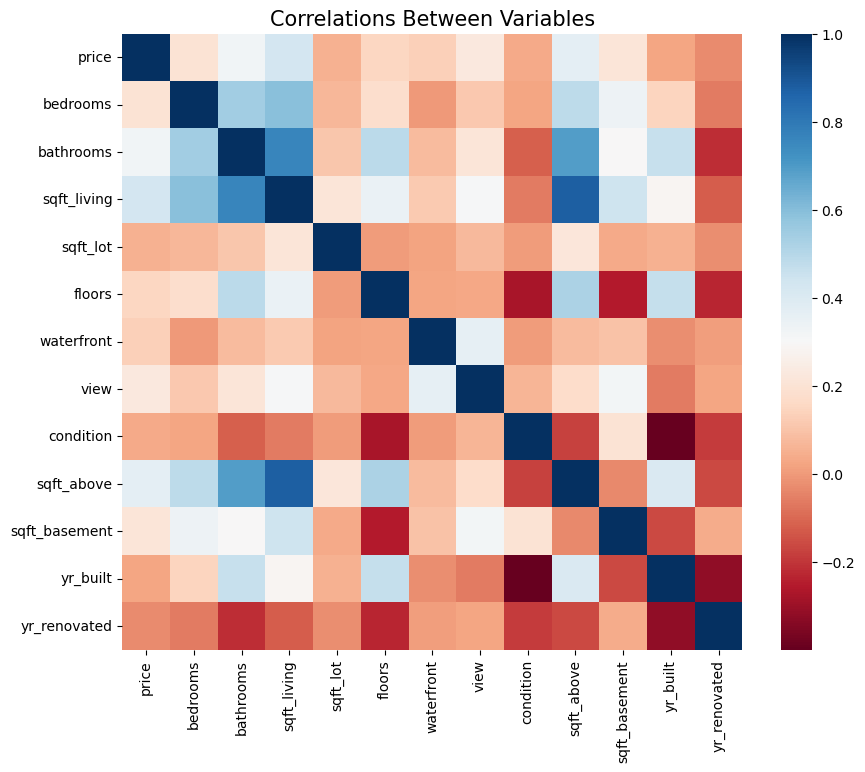

In [55]:
# Create a heatmap to visualize correlations between variables

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [56]:
# Select important numerical columns based on correlation and categorical columns

important_num_cols = list(df.corr()["price"][(df.corr()["price"]>0.50) | (df.corr()["price"]<-0.50)].index)
cat_cols = ["bedrooms", "bathrooms","sqft_living","sqft_lot","floors","condition","yr_built"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [57]:
# Display missing values by column and total missing values

print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
yr_built       0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


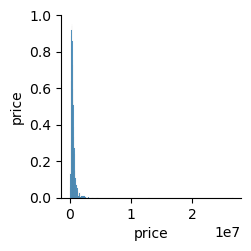

In [58]:
# Create a pair plot for important numerical columns

sns.pairplot(df[important_num_cols])

<Figure size 1000x1000 with 0 Axes>

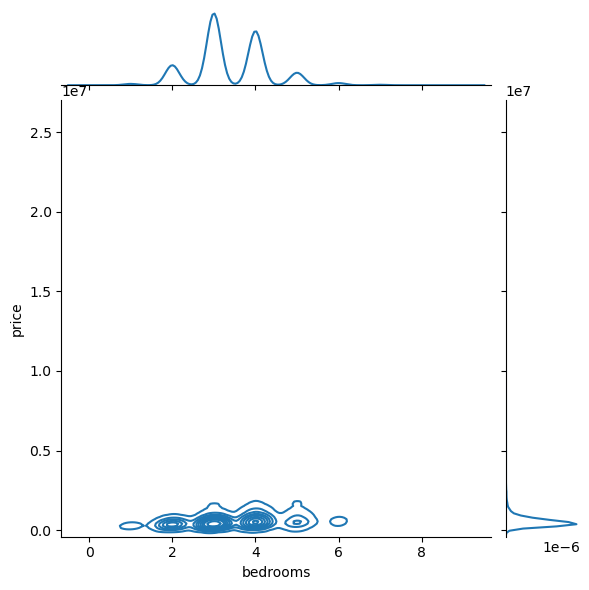

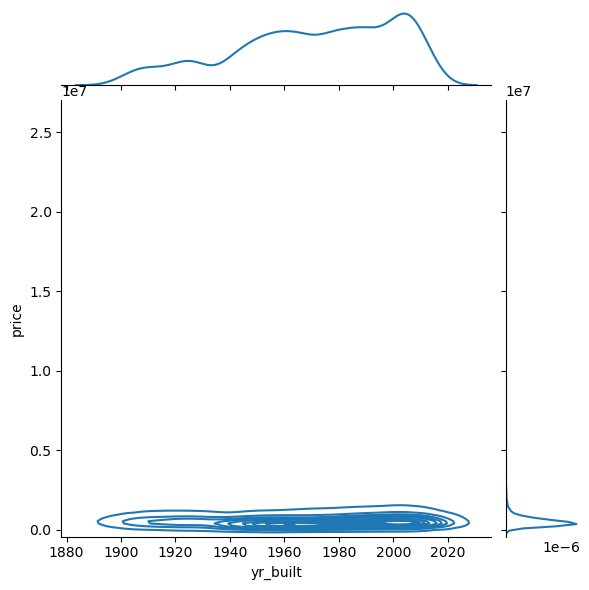

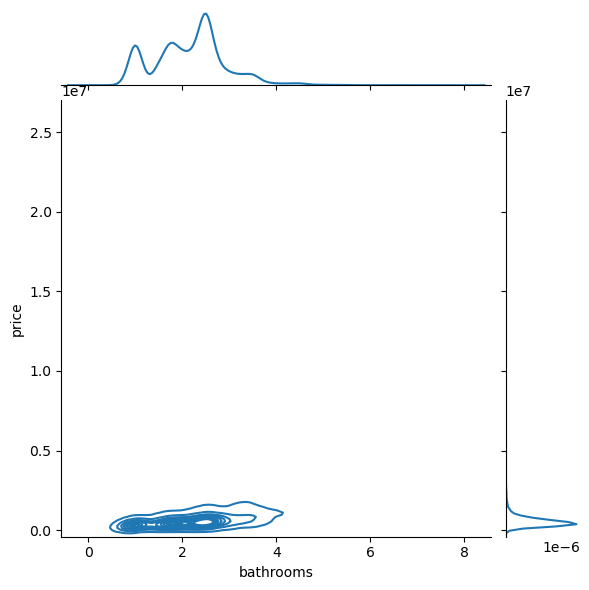

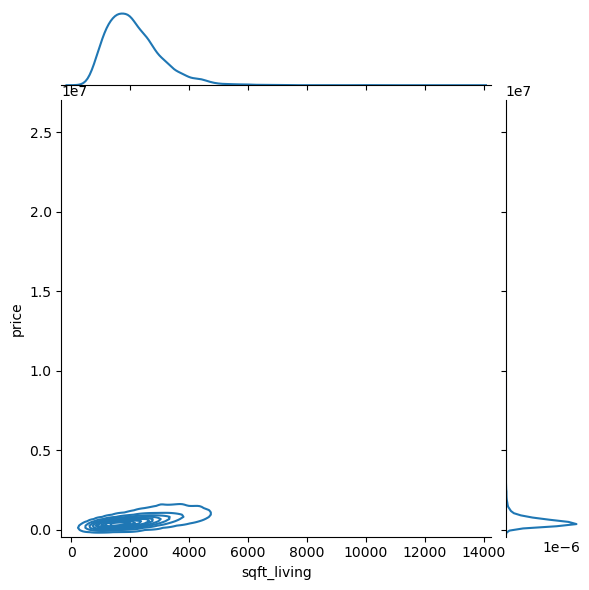

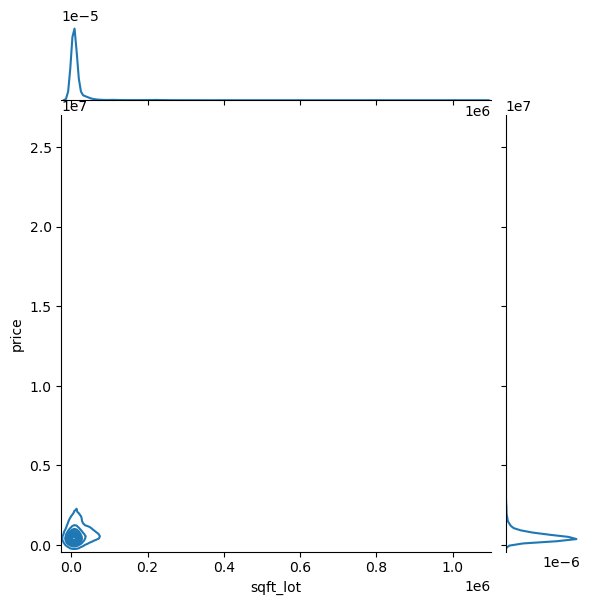

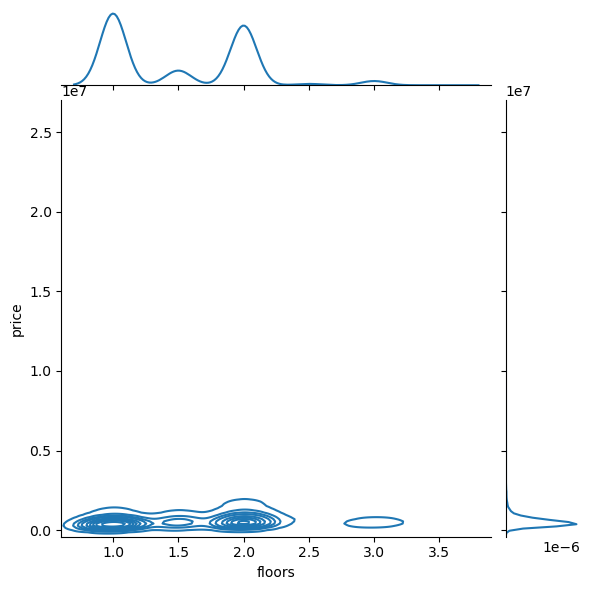

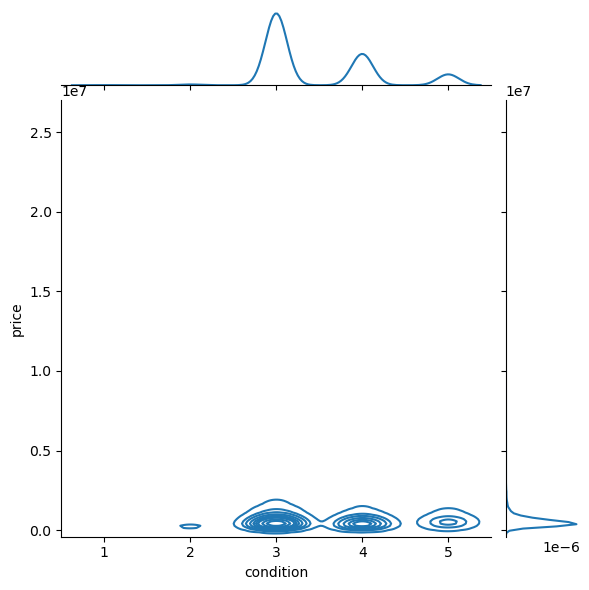

In [59]:
# Create joint plots for selected variables
plt.figure(figsize=(10, 10))

# Joint plot for bedrooms and price
sns.jointplot(x=df["bedrooms"], y=df["price"], kind="kde")

# Joint plot for yr_built and price
sns.jointplot(x=df["yr_built"], y=df["price"], kind="kde")

# Joint plot for bathrooms and price
sns.jointplot(x=df["bathrooms"], y=df["price"], kind="kde")

# Joint plot for sqft_living and price
sns.jointplot(x=df["sqft_living"], y=df["price"], kind="kde")

# Joint plot for sqft_lot and price
sns.jointplot(x=df["sqft_lot"], y=df["price"], kind="kde")

# Joint plot for floors and price
sns.jointplot(x=df["floors"], y=df["price"], kind="kde")

# Joint plot for condition and price
sns.jointplot(x=df["condition"], y=df["price"], kind="kde")

plt.show()


In [37]:
# Split the data into features (X) and target (y)
X = df.drop("price", axis=1)
y = df["price"]

In [38]:
# Convert categorical variables to one-hot encoding

X = pd.get_dummies(X, columns=cat_cols)

In [39]:
df = pd.read_csv('C:/Users/Pc/Desktop/data.csv', usecols=['price', 'bedrooms', 'bathrooms'])
important_num_cols = ['price', 'bedrooms', 'bathrooms']

# Check if the columns are in the DataFrame
if all(col in df.columns for col in important_num_cols):
    # Apply the scaler only to the selected columns
    df[important_num_cols] = scaler.fit_transform(df[important_num_cols])
else:
    raise ValueError("The columns you are trying to access are not in the DataFrame.")

In [40]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
def rmse_cv(model):
    # Calculate the root mean squared error using cross-validation

    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    # Calculate various evaluation metrics
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [42]:
# Create an empty DataFrame to store model evaluation results
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [47]:
# Create a Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
predictions = lin_reg.predict(X_test)

# Evaluate the Linear Regression model
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("-"*60)
print("Linear Regression Model")
print("-"*60)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Coefficient of Determination (R²) :", r_squared)
print("-"*60)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(lin_reg)
print("Root Mean Squared Error Cross Validation:", rmse_cross_val)

# Add the model's evaluation metrics to the DataFrame
new_row = {
    "Model": "LinearRegression",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
models = models.append(new_row, ignore_index=True)


------------------------------------------------------------
Linear Regression Model
------------------------------------------------------------
Mean Absolute Error: 3.838008560881449e+16
Mean Squared Error: 1.4021321332140735e+35
Root Mean Squared Error: 3.744505485660388e+17
Coefficient of Determination (R²) : -1.374846462747049e+23
------------------------------------------------------------
Root Mean Squared Error Cross Validation: 2.0494670786147728e+17
